# Метод k-ближайших соседей для регрессии

## Задание 2
Реализовать алгоритм K ближайших соседей для регрессии.

*    создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренировочную выборку.
*    предскажите функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.
*    постройте на одном графике исходную функцию, тренировочные объекты и предсказанные для каждого значения $k$. $y = sin(x)$

Алгоритм регрессии:

Для каждого тестового обекта:

*    вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
*    нахождение $k$ объектов с минимальными расстояниями;
*    вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [49]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [50]:
train_x = np.zeros(10)
train_x = list(map(lambda value: random.uniform(0, 5), train_x))
train_y = list(map(lambda value: math.sin(value), train_x))

In [51]:
class KNeighborsRegressor(object):
    
    def __init__(self, k_neighbors=3):
        self.k_neighbors = k_neighbors
        
    def fit(self, train_data, target):
        self.train_data = train_data
        self.target = target

    def _euclidean_distance(self, obj, data):
        return abs(obj - data)

    def find_E_values(self, obj):
        dist = []
        for index, train_point in enumerate(self.train_data):
            dist.append([index, self._euclidean_distance(obj, train_point)])

        dist = sorted(dist, key = lambda x: x[1])
        sum = 0
        for i in range(self.k_neighbors):
            sum += self.target[dist[i][0]] 
        return sum / k


1 соседей


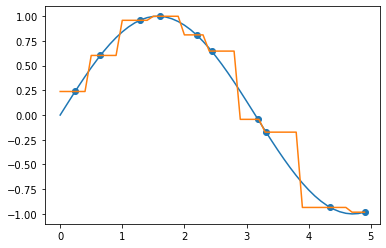

3 соседей


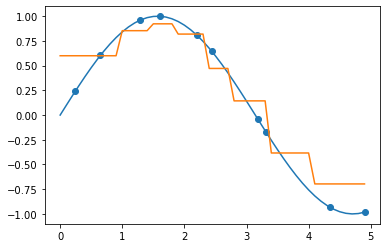

5 соседей


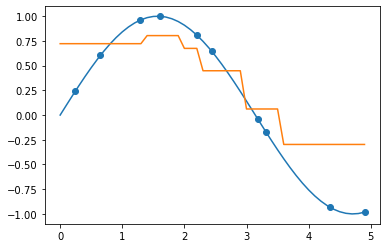

7 соседей


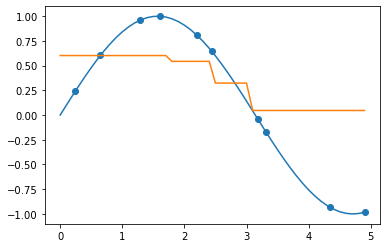

9 соседей


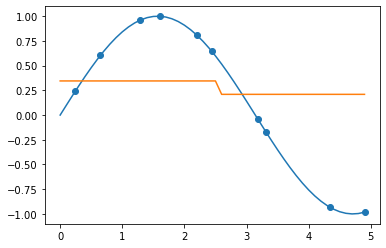

In [53]:
for k in range(1, 10, 2):
    print(k, 'соседей')
    pred_values = np.arange(0, 5, 0.1)
    reg = KNeighborsRegressor(k)
    reg.fit(train_x, train_y)
    pred_sinuses = list(map(lambda val: reg.find_E_values(val), pred_values))

    sin = list(map(lambda val: math.sin(val), pred_values))
    plt.plot(pred_values, sin) #график sin
    plt.scatter(train_x, train_y) #точки для тренировки модели из sin
    plt.plot(pred_values, pred_sinuses) #построение графика по предсказанным данным
    plt.show()